In [2]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from matplotlib import colormaps
from sklearn.datasets import make_blobs

x_max = 400
y_max = 400

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

# Initial Locations


In [3]:
num_individuals_per_type = [40000, 15000, 5500, 7500, 5500, 4000, 1000, 500, 1000]
num_types = len(num_individuals_per_type)
total_individuals = sum(num_individuals_per_type)
grid_size = (400, 400)
seed = 5464567
rng = np.random.default_rng(seed)


def rand_jitter(arr):
    stdev = 0.000005 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [4]:
rs = [1, 1, 3, 3, 3, 4, 5, 6, 6]


def create_random_clusters(grid_size, types_count, num_individuals_per_type):
    clusters = {type_id: [] for type_id in range(1, types_count + 1)}
    occupied_locations = set()

    for type_id in range(1, types_count + 1):
        locations_remaining = num_individuals_per_type[type_id - 1]

        while locations_remaining > 0:
            # Randomly determine the size of the next cluster
            cluster_size = min(
                locations_remaining,
                rng.integers(
                    num_individuals_per_type[type_id - 1] / 500,
                    num_individuals_per_type[type_id - 1] / 50,
                ),
            )  # assuming clusters are at most 100 locations

            # Generate random clusters using make_blobs
            center = rng.uniform(0, [grid_size[0], grid_size[1]], size=(1, 2))
            cluster, _ = make_blobs(
                n_samples=cluster_size,
                centers=center,
                cluster_std=(
                    (-0.000013574 * (cluster_size**2))
                    + (0.0180034 * cluster_size)
                    + 0.920899
                ),
                random_state=seed,
            )
            cluster = np.round(cluster).astype(int)

            for point in cluster:
                if locations_remaining <= 0:
                    break
                x, y = point

                # Create a tuple for the point
                point_tuple = (x % grid_size[0], y % grid_size[1])

                # Add the point to the list if it is not already occupied
                if point_tuple not in occupied_locations:
                    clusters[type_id].append(point_tuple)
                    occupied_locations.add(point_tuple)
                    locations_remaining -= 1

    # Flatten the clusters dictionary into a single list of locations
    all_locations = {}
    for type_id in range(1, types_count + 1):
        all_locations[type_id - 1] = clusters[type_id]

    return all_locations


def create_random_locations(grid_size, types_count, num_individuals_per_type):
    locations = {}
    for type_id in range(types_count):
        locs = []
        for _ in range(num_individuals_per_type[type_id]):
            x = rng.integers(0, grid_size[0])
            y = rng.integers(0, grid_size[1])
            locs.append([x, y])

        locations[type_id] = locs
    return locations


# Create the clusters
clustered_locations_dict = create_random_clusters(
    grid_size, num_types, num_individuals_per_type
)
clustered_locations_list = []
for type_id in range(len(clustered_locations_dict.keys())):
    clustered_locations_list.extend(clustered_locations_dict[type_id])
clustered_locations = np.array(clustered_locations_list)

random_locations_dict = create_random_locations(
    grid_size, num_types, num_individuals_per_type
)
random_locations_list = []
for type_id in range(len(random_locations_dict.keys())):
    random_locations_list.extend(random_locations_dict[type_id])
random_locations = np.array(random_locations_list)

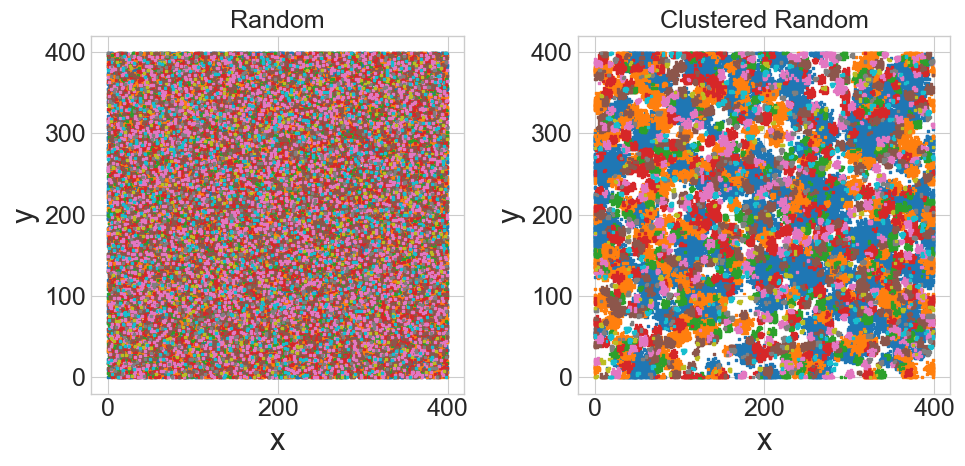

In [5]:
fig = plt.figure(figsize=(10, 5))
(ax1, ax2) = fig.subplots(1, 2)

# Create a list of colors for each type
colors = plt.colormaps["tab10"]

# Determine the type of each individual based on their index
types = []
start_index = np.zeros(num_types, dtype=int)
start_index[1:] = np.cumsum(num_individuals_per_type[:-1])
for i in range(num_types):
    types.extend([i] * num_individuals_per_type[i])
types = np.array(types)

ax1.scatter(
    rand_jitter(random_locations[:, 0]),
    rand_jitter(random_locations[:, 1]),
    c=types,
    cmap=colors,
    s=2,
    marker="s",
)
ax1.set_title("Random")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.scatter(
    rand_jitter(clustered_locations[:, 0]),
    rand_jitter(clustered_locations[:, 1]),
    c=types,
    cmap=colors,
    s=2,
    marker="s",
)
ax2.set_title("Clustered Random")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.savefig("4-initial_locations.pdf", format="pdf", bbox_inches="tight")
plt.show()

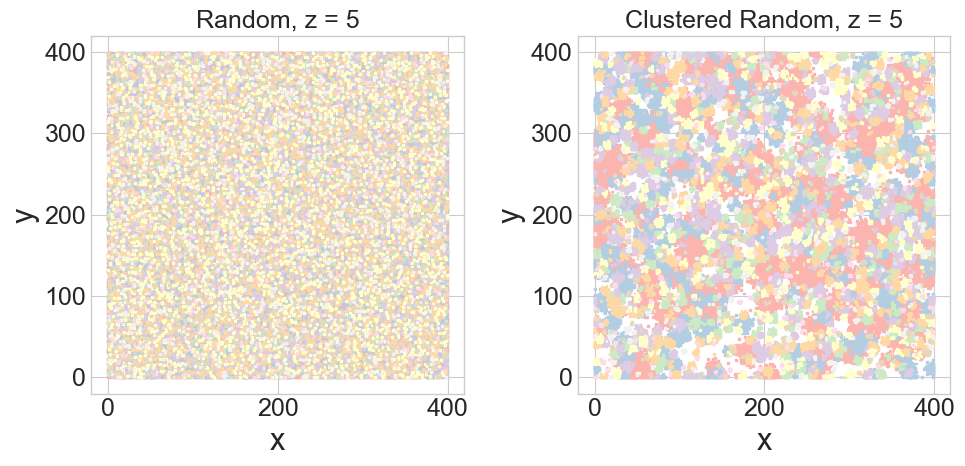

In [6]:
fig = plt.figure(figsize=(10, 5))
(ax1, ax2) = fig.subplots(1, 2)

# Create a list of colors for each type
colors = plt.colormaps["Pastel1"]

# Determine the type of each individual based on their index
types = []
start_index = np.zeros(num_types, dtype=int)
start_index[1:] = np.cumsum(num_individuals_per_type[:-1])
for i in range(num_types):
    types.extend([i] * num_individuals_per_type[i])
types = np.array(types)

ax1.scatter(
    rand_jitter(random_locations[:, 0]),
    rand_jitter(random_locations[:, 1]),
    c=types,
    cmap=colors,
    s=2,
    marker="s",
)
ax1.set_title("Random, z = 5")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.scatter(
    rand_jitter(clustered_locations[:, 0]),
    rand_jitter(clustered_locations[:, 1]),
    c=types,
    cmap=colors,
    s=2,
    marker="s",
)
ax2.set_title("Clustered Random, z = 5")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.savefig("4-initial_locations_pastel.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Monod


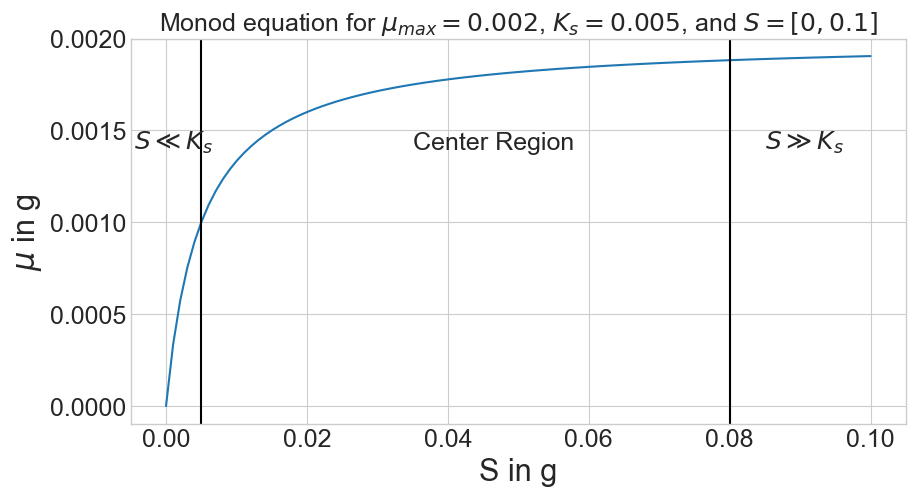

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

xs = np.linspace(0, 0.1, 100)
ys = (0.002 * xs) / (0.005 + xs)

plt.plot(xs, ys)
plt.title(r"Monod equation for $\mu_{max}=0.002$, $K_s=0.005$, and $S=[0,0.1]$")
ax.set_xlabel("S in g")
ax.set_ylabel(r"$\mu$ in g")
plt.axvline(x=0.005, c="black")
plt.axvline(x=0.08, c="black")
plt.text(-0.0045, 0.0014, r"$S \ll K_s$")
plt.text(0.035, 0.0014, "Center Region")
plt.text(0.085, 0.0014, r"$S \gg K_s$")

plt.savefig("4-monod-regimes.pdf", format="pdf", bbox_inches="tight")
plt.show()

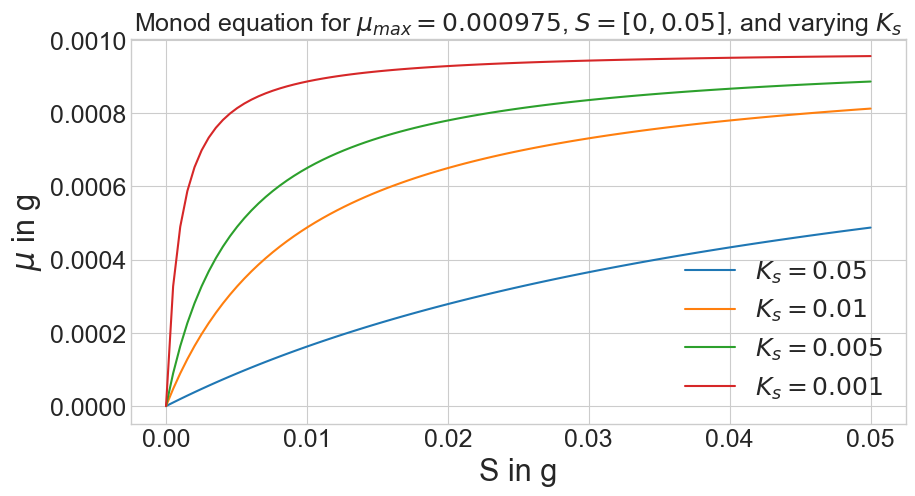

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

xs = np.linspace(0, 0.05, 100)
ys = (0.000975 * xs) / (0.05 + xs)
plt.plot(xs, ys, label=r"$K_s=0.05$")

ys = (0.000975 * xs) / (0.01 + xs)
plt.plot(xs, ys, label=r"$K_s=0.01$")

ys = (0.000975 * xs) / (0.005 + xs)
plt.plot(xs, ys, label=r"$K_s=0.005$")

ys = (0.000975 * xs) / (0.001 + xs)
plt.plot(xs, ys, label=r"$K_s=0.001$")

ax.set_ylabel(r"$\mu$ in g")
ax.set_xlabel("S in g")

plt.title(r"Monod equation for $\mu_{max}=0.000975$, $S=[0,0.05]$, and varying $K_s$")
plt.legend()

plt.savefig("4-hs-effect.pdf", format="pdf", bbox_inches="tight")
plt.show()

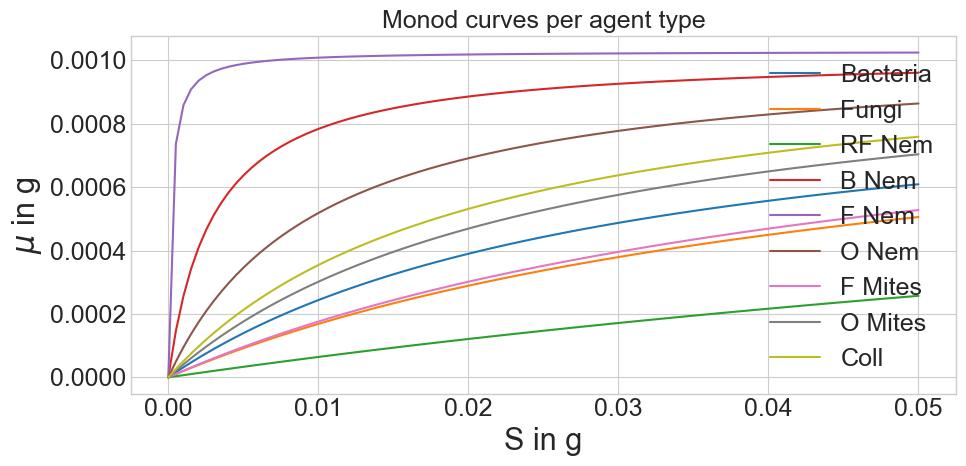

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

xs = np.linspace(0, 0.05, 100)

ys = (0.000975 * xs) / (0.03 + xs)
plt.plot(xs, ys, label="Bacteria")

ys = (0.001012 * xs) / (0.05 + xs)
plt.plot(xs, ys, label="Fungi")

ys = (0.001029 * xs) / (0.15 + xs)
plt.plot(xs, ys, label="RF Nem")

ys = (0.001019 * xs) / (0.003 + xs)
plt.plot(xs, ys, label="B Nem")

ys = (0.001029 * xs) / (0.0002 + xs)
plt.plot(xs, ys, label="F Nem")

ys = (0.001037 * xs) / (0.01 + xs)
plt.plot(xs, ys, label="O Nem")

ys = (0.001056 * xs) / (0.05 + xs)
plt.plot(xs, ys, label="F Mites")

ys = (0.001056 * xs) / (0.025 + xs)
plt.plot(xs, ys, label="O Mites")

ys = (0.001063 * xs) / (0.02 + xs)
plt.plot(xs, ys, label="Coll")

ax.set_ylabel(r"$\mu$ in g")
ax.set_xlabel("S in g")

plt.title("Monod curves per agent type")
plt.legend()

plt.tight_layout()
plt.savefig("4-k-vals.pdf", format="pdf", bbox_inches="tight")
plt.savefig("4-k-vals.png", format="png", bbox_inches="tight")
plt.show()

# Calibration


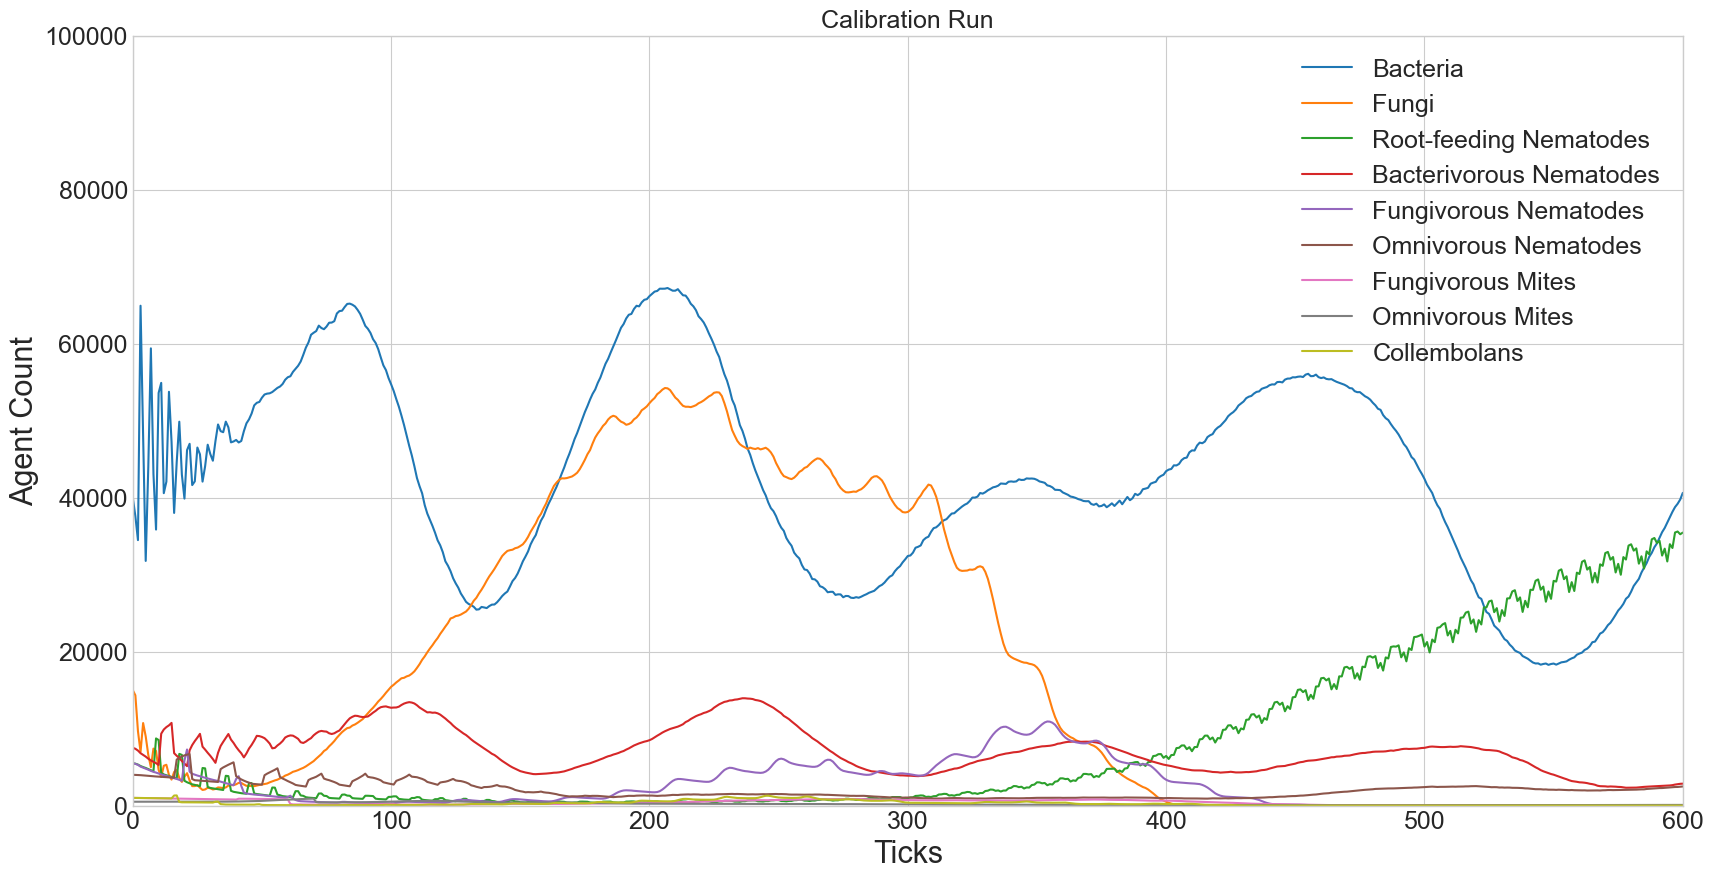

In [10]:
filename = "random_1"
path = "../experiments/raw_data/"
df = pl.read_parquet(path + filename + ".parquet")

# Define colors
colors = colormaps["tab10"].colors

# Group by type and tick, counting occurrences
counts_per_type = df.group_by(["type", "tick"]).agg(pl.len().alias("count"))

# Define organism group labels
organism_group_labels = [
    "Bacteria",
    "Fungi",
    "Root-feeding Nematodes",
    "Bacterivorous Nematodes",
    "Fungivorous Nematodes",
    "Omnivorous Nematodes",
    "Fungivorous Mites",
    "Omnivorous Mites",
    "Collembolans",
]

# Get all unique tick values
unique_ticks = pl.DataFrame({"tick": df["tick"].unique().sort()})

# Plot setup
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Iterate over organism types
unique_types = df["type"].unique().to_list()
for i, org_type in enumerate(unique_types):
    # Filter counts for the given type
    filtered_counts = counts_per_type.filter(pl.col("type") == org_type)

    # Left join with full tick range to ensure all ticks exist
    filled_counts = (
        unique_ticks.join(filtered_counts, on="tick", how="left")
        .fill_null(0)  # Fill missing tick values with 0
        .sort("tick")  # Ensure sorting
    )

    # Plot results
    plt.plot(
        filled_counts["tick"].to_list(),
        filled_counts["count"].to_list(),
        label=organism_group_labels[i],
        color=colors[i],
    )

# Formatting
ax.set_xlim(0, 600)
ax.set_ylim(0, 100000)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")
ax.set_title("Calibration Run")

plt.legend()
plt.savefig("./4-calibration.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Stochasticity


In [11]:
plt.close("all")
filenames = [
    "random_1",
    "random_2",
    "random_3",
    "random_4",
    "clustered_1",
    "clustered_2",
    "clustered_3",
    "clustered_4",
]
path = "../experiments/raw_data/"

organism_group_labels = [
    "Bacteria",
    "Fungi",
    "Root-feeding Nematodes",
    "Bacterivorous Nematodes",
    "Fungivorous Nematodes",
    "Omnivorous Nematodes",
    "Fungivorous Mites",
    "Omnivorous Mites",
    "Collembolans",
]
dataset_labels = [
    "Locs: R, S: 1",
    "Locs: R, S: 2",
    "Locs: R, S: 3",
    "Locs: R, S: 4",
    "Locs: C, S: 1",
    "Locs: C, S: 2",
    "Locs: C, S: 3",
    "Locs: C, S: 4",
]

# Line styles and colors reflecting combinations of variables
line_styles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]  # Line style per seed type
colors = [
    "blue",
    "blue",
    "blue",
    "blue",
    "orange",
    "orange",
    "orange",
    "orange",
]  # Color per init loc type

counts_per_types = [
    pl.read_parquet(path + filename + ".parquet")
    .group_by(["type", "tick"])
    .agg(pl.len().alias("count"))
    for filename in filenames
]

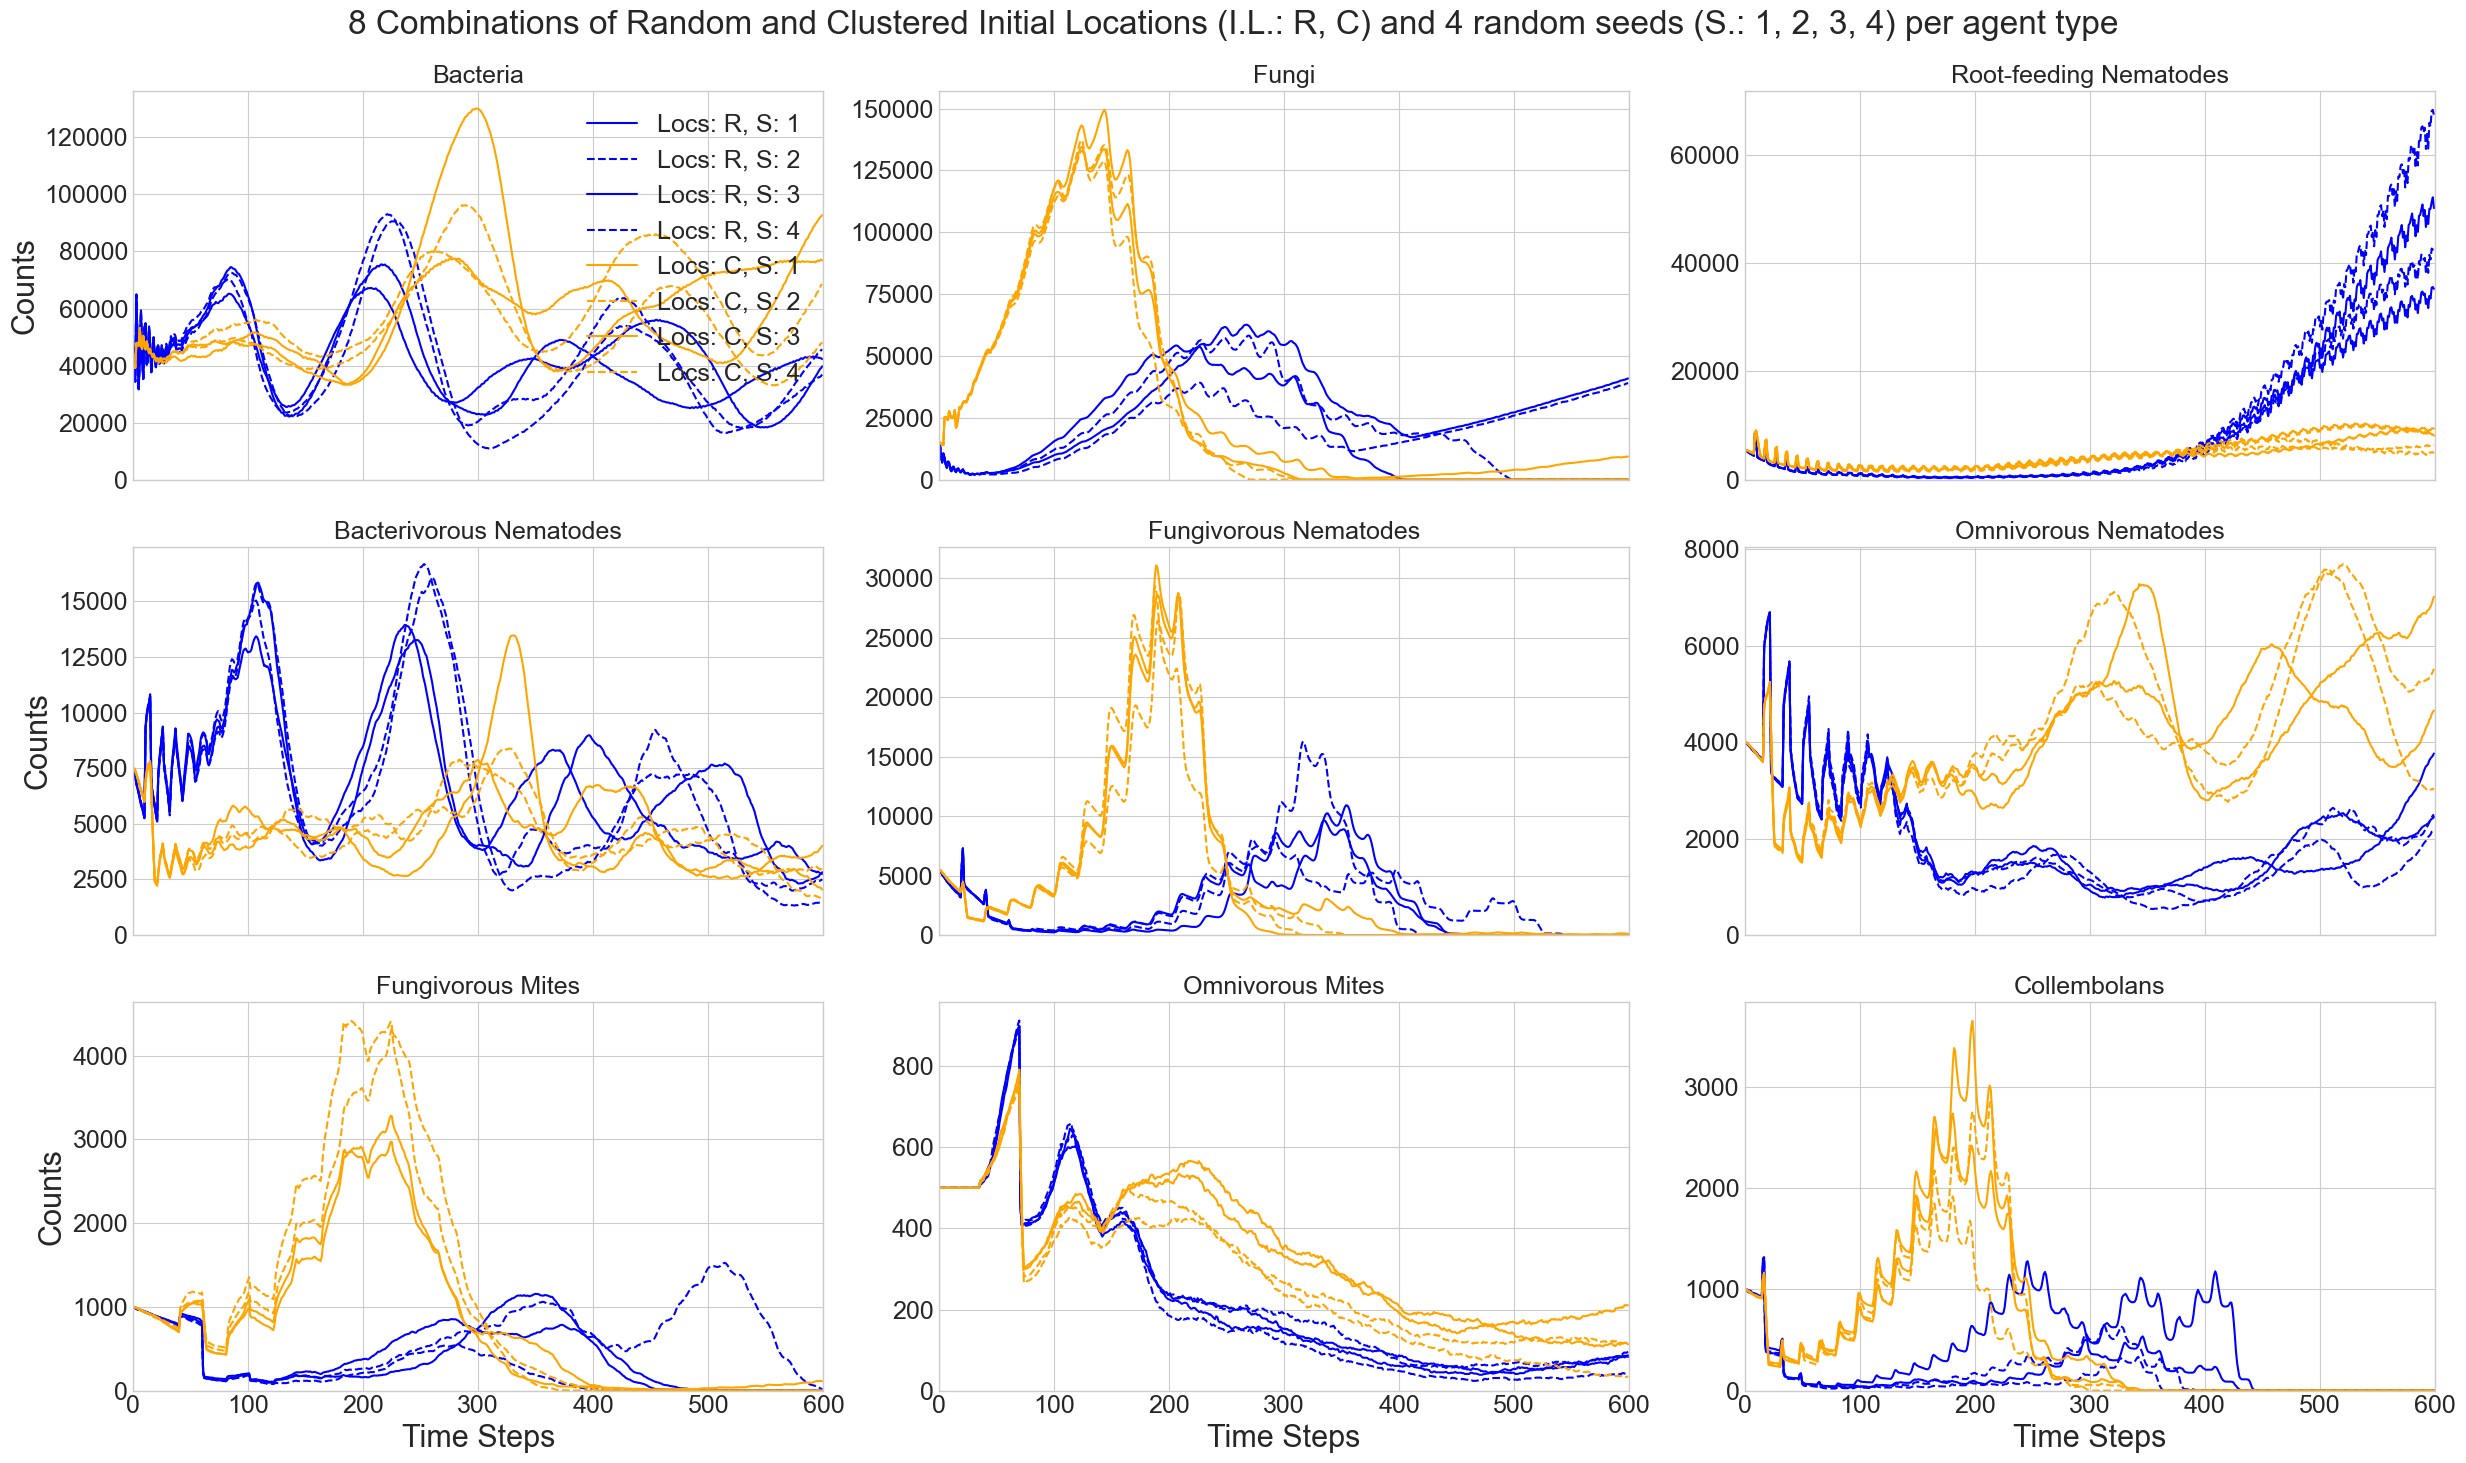

In [12]:
# Create a DataFrame with the full tick range for reindexing
full_tick_range = pl.DataFrame({"tick": pl.Series(range(600))})

# Plot configuration
fig, axs = plt.subplots(3, 3, figsize=(25, 15))
fig.suptitle(
    "8 Combinations of Random and Clustered Initial Locations (I.L.: R, C) and 4 random seeds (S.: 1, 2, 3, 4) per agent type"
)

# Loop through each type and create a subplot
for type_id in range(9):
    ax = axs[type_id // 3, type_id % 3]  # Determine subplot position

    for i, dataset in enumerate(counts_per_types):
        # Ensure the dataset contains the required type
        filtered_data = dataset.filter(pl.col("type") == type_id)

        # Join with full tick range and fill missing values with 0
        filled_data = (
            full_tick_range.join(filtered_data, on="tick", how="left")
            .fill_null(0)
            .sort("tick")
        )

        # Determine color and style based on index
        color = colors[i]  # Variable 1 controls the color
        style = line_styles[i % 2]  # Variable 2 controls the line style

        # Plot data
        ax.plot(
            filled_data["tick"].to_list(),
            filled_data["count"].to_list(),
            label=dataset_labels[i],
            color=color,
            linestyle=style,
        )

    ax.set_xlim(0, 600)
    ax.set_ylim(0)
    ax.set_title(organism_group_labels[type_id])

    # Axis labels
    if type_id in [0, 3, 6]:
        ax.set_ylabel("Counts")
    if type_id in [6, 7, 8]:
        ax.set_xlabel("Time Steps")
    else:
        ax.set_xticklabels([])

    # Add legend in the first subplot only
    if type_id == 0:
        ax.legend()

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig("./4-count-comp.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [13]:
filenames = [
    "random_1",
    "random_2",
    "random_1_2",
    "random_2_2",
    "clustered_1",
    "clustered_2",
    "clustered_1_2",
    "clustered_2_2",
]
path = "../experiments/raw_data/"

organism_group_labels = [
    "Bacteria",
    "Fungi",
    "Root-feeding Nematodes",
    "Bacterivorous Nematodes",
    "Fungivorous Nematodes",
    "Omnivorous Nematodes",
    "Fungivorous Mites",
    "Omnivorous Mites",
    "Collembolans",
]
dataset_labels = [
    "IL: R1, S: 1",
    "IL: R1, S: 2",
    "IL: R2, S: 1",
    "IL: R2, S: 2",
    "IL: C1, S: 1",
    "IL: C1, S: 2",
    "IL: C2, S: 1",
    "IL: C2, S: 2",
]

# Line styles and colors reflecting combinations of variables
line_styles = ["-", "--", "-", "--", "-", "--", "-", "--"]  # Line style per seed
cm = colormaps["Set2"].colors
colors = [
    cm[0],
    cm[0],
    cm[1],
    cm[1],
    cm[2],
    cm[2],
    cm[3],
    cm[3],
]  # Colors per init loc type

counts_per_types = [
    pl.read_parquet(path + filename + ".parquet")
    .group_by(["type", "tick"])
    .agg(pl.len().alias("count"))
    for filename in filenames
]

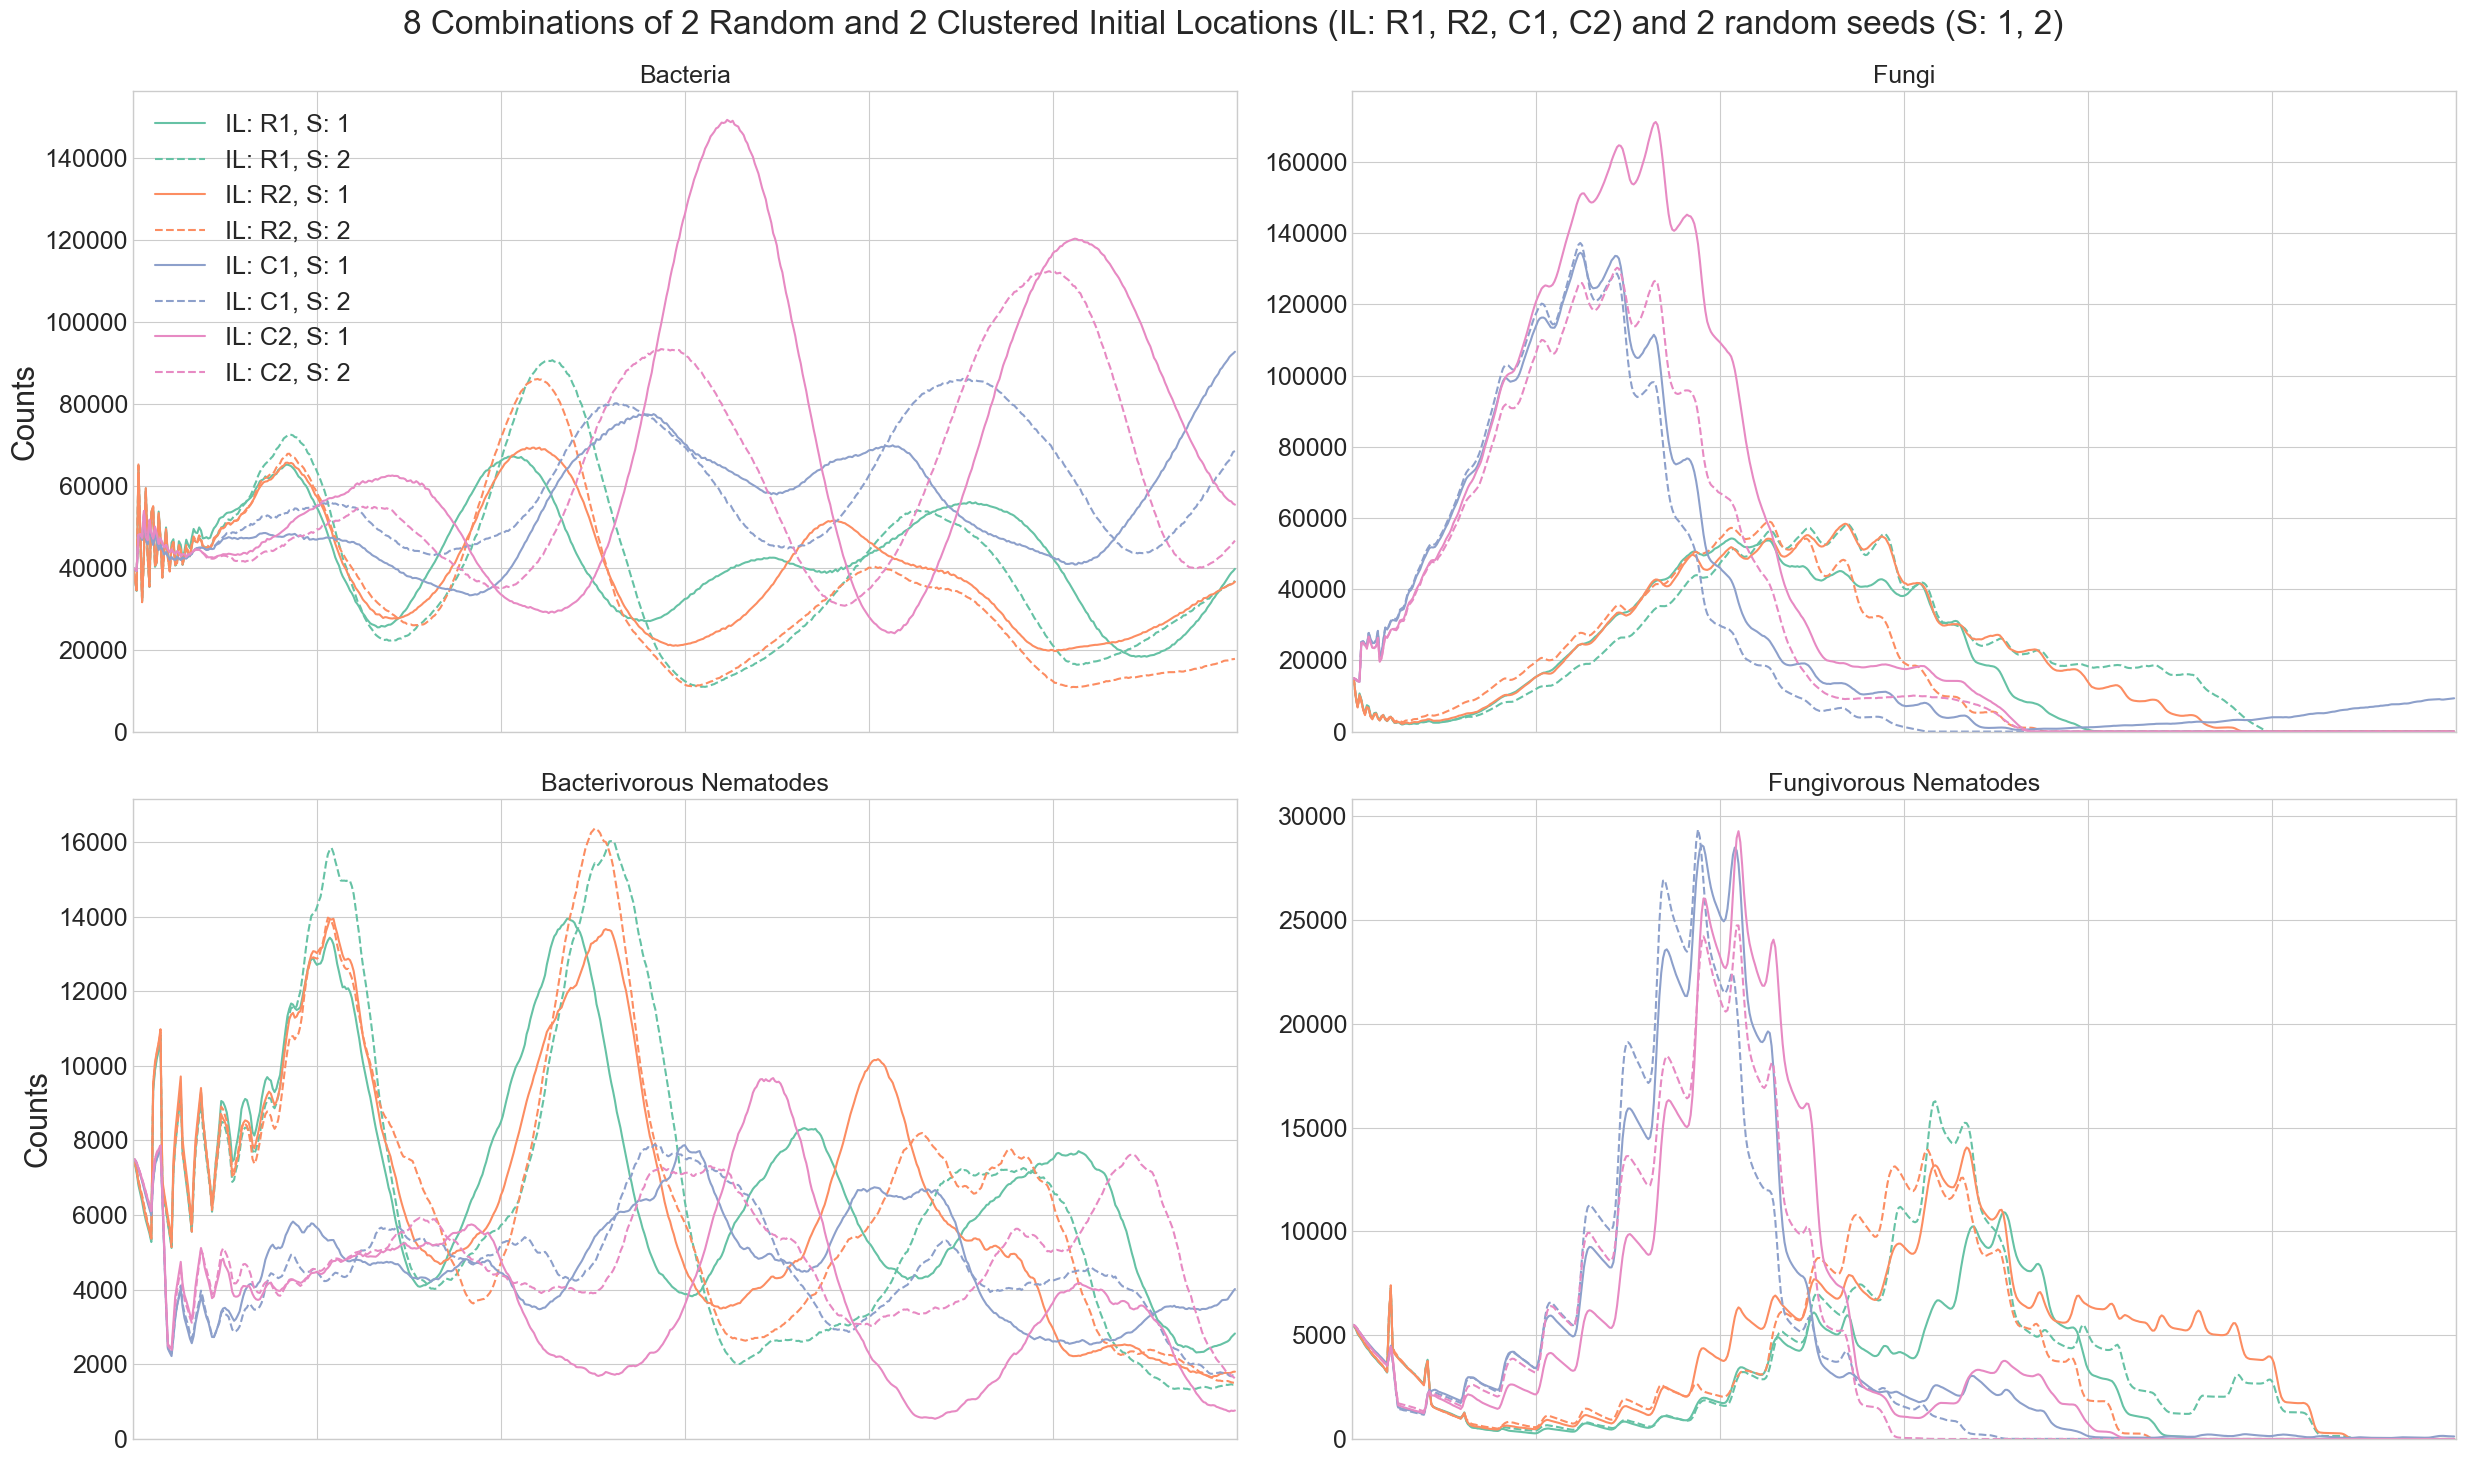

In [14]:
# Create a DataFrame with the full tick range for reindexing
full_tick_range = pl.DataFrame({"tick": pl.Series(range(600))})

# Plot configuration
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle(
    "8 Combinations of 2 Random and 2 Clustered Initial Locations (IL: R1, R2, C1, C2) and 2 random seeds (S: 1, 2)"
)

# Loop through each type and create a subplot
for type_id in range(9):
    if type_id in [2, 5, 6, 7, 8]:
        continue
    ax = axs[type_id // 3, type_id % 3]  # Determine subplot position

    for i, dataset in enumerate(counts_per_types):
        # Ensure the dataset contains the required type
        filtered_data = dataset.filter(pl.col("type") == type_id)

        # Join with full tick range and fill missing values with 0
        filled_data = (
            full_tick_range.join(filtered_data, on="tick", how="left")
            .fill_null(0)
            .sort("tick")
        )

        # Determine color and style based on index
        color = colors[i]  # Variable 1 controls the color
        style = line_styles[i % 2]  # Variable 2 controls the line style

        # Plot data
        ax.plot(
            filled_data["tick"].to_list(),
            filled_data["count"].to_list(),
            label=dataset_labels[i],
            color=color,
            linestyle=style,
        )

    ax.set_xlim(0, 600)
    ax.set_ylim(0)
    ax.set_title(organism_group_labels[type_id])

    # Axis labels
    if type_id in [0, 3, 6]:
        ax.set_ylabel("Counts")
    if type_id in [6, 7, 8]:
        ax.set_xlabel("Time Steps")
    else:
        ax.set_xticklabels([])

    # Add legend in the first subplot only
    if type_id == 0:
        ax.legend()

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig("./4-count-comp.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Sample Locations


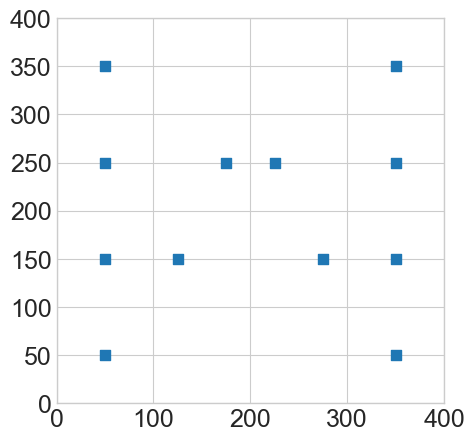

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(
    *zip(
        *[
            (50, 50),
            (50, 150),
            (50, 250),
            (50, 350),
            (125, 150),
            (175, 250),
            (275, 150),
            (225, 250),
            (350, 50),
            (350, 150),
            (350, 250),
            (350, 350),
        ]
    ),
    marker="s",
    s=50,
)
ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
_ = ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])

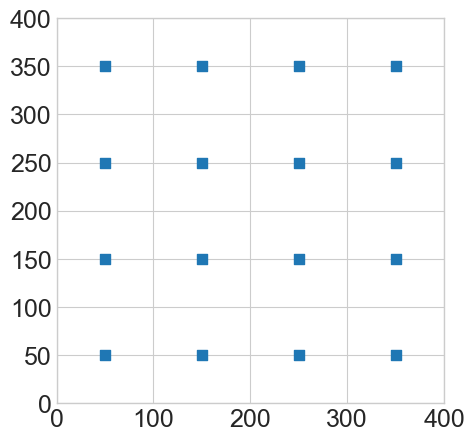

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(
    *zip(
        *[
            (50, 50),
            (50, 150),
            (50, 250),
            (50, 350),
            (150, 50),
            (150, 150),
            (150, 250),
            (150, 350),
            (250, 50),
            (250, 150),
            (250, 250),
            (250, 350),
            (350, 50),
            (350, 150),
            (350, 250),
            (350, 350),
        ]
    ),
    marker="s",
    s=50,
)
ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
_ = ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])